In [1]:
# Import the dependencies.

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.

lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.               Module 6.1.4

coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.       Module 6.1.4

for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-44.8757791509504 164.09486523366058
-41.969882482210714 10.639726267480114
-3.7021541874732833 -42.39168395957162
71.24313272541576 28.253569598213915
2.195807301578256 -39.41063790291901
-89.23355724347758 -55.66772062665029
79.79708600596842 -73.18337789014831
-38.71109414432816 -46.71383349765196
-6.693804904915922 -16.780662180752643
-43.85980538210812 153.23710612183248
-47.5951077205474 -145.926092176159
-58.85277690341514 -86.91659516928476
-31.254008004721797 76.06329426301556
-26.853805735222146 29.2784904248405
-52.882064090803745 24.8580086819899
-22.649757963105557 54.97583338859829
10.062391138703134 51.71390218463904
-34.609430289822264 -84.3068800885559
-26.817346949140358 7.937444506542306
-50.981210612434005 -9.186873204789293
42.32118452913056 -90.47688640813138
24.209937636941177 140.34344518547658
38.07985627632377 -56.330473759072575
23.868397635681504 129.3138287325894
-57.02794864982743 -53.88368512503642
-63.24851971438825 10.873618106796755
16.353367304175478 

In [5]:
#install citipy module in WeatherPy file            Module6.1.5

#pip install citipy

!pip install citipy

In [5]:
from citipy import citipy

# Create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and longitude combination.

for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count.

len(cities)


610

In [6]:
#checking current version of the Requests Library         Module 6.2.2

import requests
requests.__version__

'2.28.1'

In [7]:
# Import the Requests Library and my API key            Module 6.2.6

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [9]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

# Import the time library and the datetime module from the datetime library.

import time
from datetime import datetime

In [10]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i in range (len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)
                    
# Loop through all the cities in the list.        6.2.6 Need explaination on both For loops to better understand.
for i, city in enumerate(cities):

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

                    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count.
    record_count += 1

#                                         Module6.2.6 - Handle API Request Errors with try-except Blocks
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")    

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 13 | bud
Processing Record 2 of Set 13 | poum
Processing Record 3 of Set 13 | punta arenas
Processing Record 4 of Set 13 | samusu
City not found. Skipping...
Processing Record 5 of Set 13 | santa isabel
Processing Record 6 of Set 13 | vaini
Processing Record 7 of Set 13 | rikitea
Processing Record 8 of Set 13 | qaanaaq
Processing Record 9 of Set 13 | castro
Processing Record 10 of Set 13 | moose factory
Processing Record 11 of Set 13 | jamestown
Processing Record 12 of Set 13 | severo-kurilsk
Processing Record 13 of Set 13 | yar-sale
Processing Record 14 of Set 13 | mataura
Processing Record 15 of Set 13 | ulaangom
Processing Record 16 of Set 13 | hervey bay
Processing Record 17 of Set 13 | tuy hoa
Processing Record 18 of Set 13 | hithadhoo
Processing Record 19 of Set 13 | evensk
Processing Record 20 of Set 13 | albany
Processing Record 21 of Set 13 | laramie
Processing Record 22 of Set 13 | ushuaia


Processing Record 179 of Set 13 | kasongo
Processing Record 180 of Set 13 | tsiroanomandidy
Processing Record 181 of Set 13 | sennoy
Processing Record 182 of Set 13 | tanout
Processing Record 183 of Set 13 | meyungs
City not found. Skipping...
Processing Record 184 of Set 13 | ayan
Processing Record 185 of Set 13 | kurumkan
Processing Record 186 of Set 13 | quatre cocos
Processing Record 187 of Set 13 | shakawe
Processing Record 188 of Set 13 | carnarvon
Processing Record 189 of Set 13 | parana
Processing Record 190 of Set 13 | kargil
Processing Record 191 of Set 13 | camalu
Processing Record 192 of Set 13 | lolua
City not found. Skipping...
Processing Record 193 of Set 13 | kodiak
Processing Record 194 of Set 13 | ambon
Processing Record 195 of Set 13 | madisonville
Processing Record 196 of Set 13 | huarmey
Processing Record 197 of Set 13 | barber
Processing Record 198 of Set 13 | vardo
Processing Record 199 of Set 13 | tiznit
Processing Record 200 of Set 13 | ormond beach
Processing 

Processing Record 363 of Set 13 | sattahip
Processing Record 364 of Set 13 | pochutla
Processing Record 365 of Set 13 | plyussa
Processing Record 366 of Set 13 | bom jesus
Processing Record 367 of Set 13 | mahibadhoo
Processing Record 368 of Set 13 | tabou
Processing Record 369 of Set 13 | marystown
Processing Record 370 of Set 13 | leningradskiy
Processing Record 371 of Set 13 | nuuk
Processing Record 372 of Set 13 | toliary
City not found. Skipping...
Processing Record 373 of Set 13 | provideniya
Processing Record 374 of Set 13 | naze
Processing Record 375 of Set 13 | san jose
Processing Record 376 of Set 13 | bogorodskoye
Processing Record 377 of Set 13 | grand gaube
Processing Record 378 of Set 13 | itapicuru
Processing Record 379 of Set 13 | newport
Processing Record 380 of Set 13 | hay river
Processing Record 381 of Set 13 | clermont
Processing Record 382 of Set 13 | ballina
Processing Record 383 of Set 13 | coihaique
Processing Record 384 of Set 13 | gamba
Processing Record 385 

Processing Record 546 of Set 13 | sorvag
City not found. Skipping...
Processing Record 547 of Set 13 | heide
Processing Record 548 of Set 13 | berlevag
Processing Record 549 of Set 13 | ust-nera
Processing Record 550 of Set 13 | angoche
Processing Record 551 of Set 13 | vestmanna
Processing Record 552 of Set 13 | sovetskiy
Processing Record 553 of Set 13 | do rud
City not found. Skipping...
Processing Record 554 of Set 13 | moron
Processing Record 555 of Set 13 | jijiga
Processing Record 556 of Set 13 | sampit
Processing Record 557 of Set 13 | nishihara
Processing Record 558 of Set 13 | gat
Processing Record 559 of Set 13 | pyaozerskiy
Processing Record 560 of Set 13 | brownsville
Processing Record 561 of Set 13 | zhanatas
City not found. Skipping...
Processing Record 562 of Set 13 | gataivai
Processing Record 563 of Set 13 | sai buri
Processing Record 564 of Set 13 | singapore
Processing Record 565 of Set 13 | ciudad dario
Processing Record 566 of Set 13 | manta
Processing Record 567 

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.           M6.2.7

city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bud,39.4470,-86.1758,24.98,85,99,8.86,US,2023-01-27 04:22:58
1,Poum,-20.2333,164.0167,82.45,78,21,9.24,NC,2023-01-27 04:22:59
2,Punta Arenas,-53.1500,-70.9167,46.51,66,0,13.80,CL,2023-01-27 04:22:59
3,Santa Isabel,-23.3156,-46.2214,65.50,96,48,1.97,BR,2023-01-27 04:23:00
4,Vaini,-21.2000,-175.2000,82.56,89,75,4.61,TO,2023-01-27 04:23:00
5,Rikitea,-23.1203,-134.9692,79.07,74,100,13.73,PF,2023-01-27 04:23:00
6,Qaanaaq,77.4840,-69.3632,-6.03,69,80,5.48,GL,2023-01-27 04:23:01
7,Castro,-24.7911,-50.0119,56.25,90,0,5.41,BR,2023-01-27 04:23:01
8,Moose Factory,51.2585,-80.6094,-22.02,76,0,4.61,CA,2023-01-27 04:23:01
9,Jamestown,42.0970,-79.2353,29.79,97,100,7.00,US,2023-01-27 04:23:02


In [12]:
# Reorder the columns                                6.2.7 How do you update df with the updated column order?

new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

#Assign updated columns to dataframe

city_data_df = city_data_df[new_column_order]


In [13]:
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Bud,US,2023-01-27 04:22:58,39.4470,-86.1758,24.98,85,99,8.86
1,Poum,NC,2023-01-27 04:22:59,-20.2333,164.0167,82.45,78,21,9.24
2,Punta Arenas,CL,2023-01-27 04:22:59,-53.1500,-70.9167,46.51,66,0,13.80
3,Santa Isabel,BR,2023-01-27 04:23:00,-23.3156,-46.2214,65.50,96,48,1.97
4,Vaini,TO,2023-01-27 04:23:00,-21.2000,-175.2000,82.56,89,75,4.61
5,Rikitea,PF,2023-01-27 04:23:00,-23.1203,-134.9692,79.07,74,100,13.73
6,Qaanaaq,GL,2023-01-27 04:23:01,77.4840,-69.3632,-6.03,69,80,5.48
7,Castro,BR,2023-01-27 04:23:01,-24.7911,-50.0119,56.25,90,0,5.41
8,Moose Factory,CA,2023-01-27 04:23:01,51.2585,-80.6094,-22.02,76,0,4.61
9,Jamestown,US,2023-01-27 04:23:02,42.0970,-79.2353,29.79,97,100,7.00


In [14]:
# create an output file to save the DataFrame as a CSV 
# Create the output file (CSV).

output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [ ]:
# Module 6.3.1

# create a series of scatter plots for each weather parameter against the latitude for all the cities.
# create scatter plots for latitude vs. maximum temperature, humidity, cloudiness, and wind speed.

In [15]:
# Extract relevant fields from the DataFrame for plotting.           Module6.3.1

lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

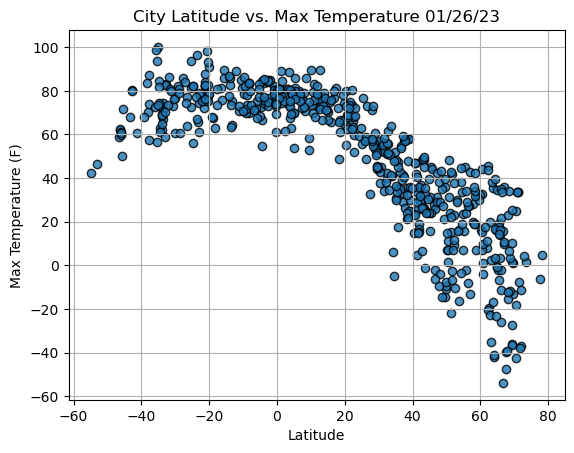

In [16]:
# Import time module                 Module 6.3.1

import time

# Build the scatter plot for latitude vs. max temperature.

plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.

plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.

plt.savefig("weather_data/Fig1.png")

# Show plot.

plt.show()

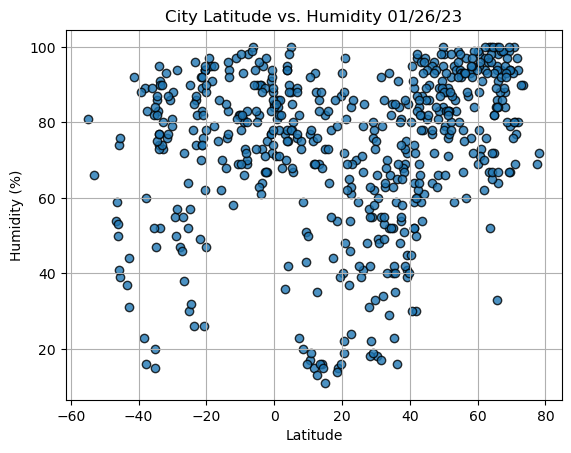

In [17]:
# Build the scatter plots for latitude vs. humidity.            Module6.3.2

plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.

plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.

plt.savefig("weather_data/Fig2.png")

# Show plot.

plt.show()

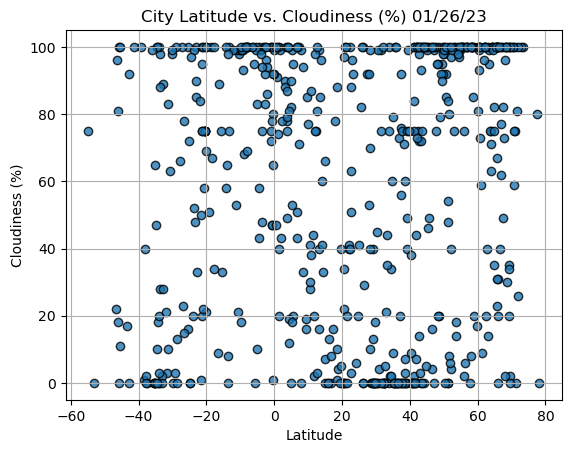

In [18]:
# Build the scatter plots for latitude vs. cloudiness.                Module6.3.3

plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.

plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.

plt.savefig("weather_data/Fig3.png")

# Show plot.

plt.show()

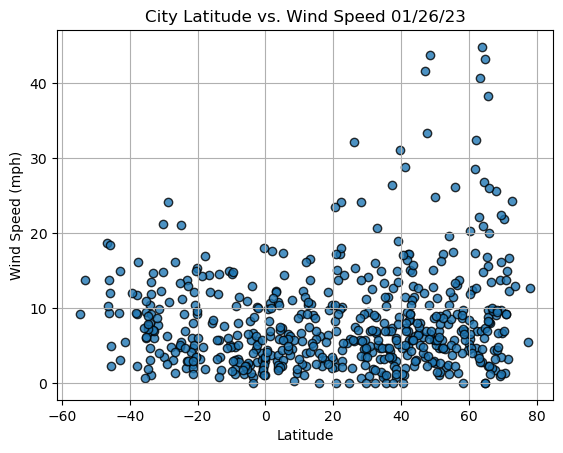

In [19]:
# Build the scatter plots for latitude vs. wind speed.         Module 6.3.4

plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.

plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.

plt.savefig("weather_data/Fig4.png")

# Show plot.

plt.show()

In [8]:
# Create a function to create perform linear regression on the weather data      Module6.4.2
# and plot a regression line and the equation with the data.

def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Import linregress
    from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.

def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.    
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create a scatter plot and plot the regression line.
    
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    
    # Annotate the text for the line equation.
    
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()
    
    # running this code (above), there will be no output until we call the function with five parameters.